<figure><figure>
    <center> <img src="./images/5.PNG"><center/>
</figure>

## Import Libraries

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Collection

In [262]:
# Load the dataset
wine_dataset = pd.read_csv("./Datasets/winequality-red.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [263]:
# Check rows and columns
wine_dataset.shape

(1599, 12)

In [264]:
# Information of the dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [265]:
# Check missing values
wine_dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [266]:
# Statical measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


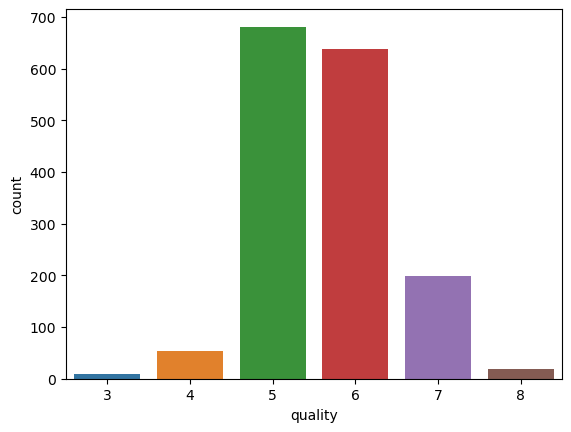

In [267]:
# number of values for each  quality
sns.countplot(data=wine_dataset, x="quality")
plt.show()

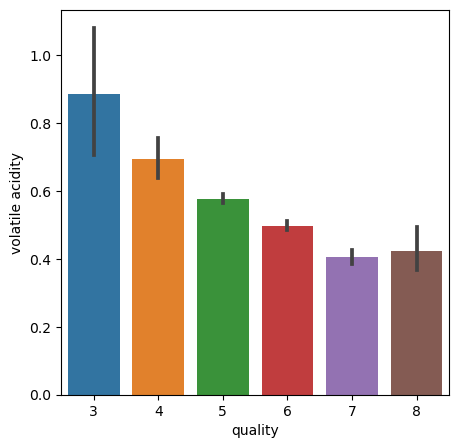

In [268]:
# volatile acility vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset, x="quality", y="volatile acidity")
plt.show()

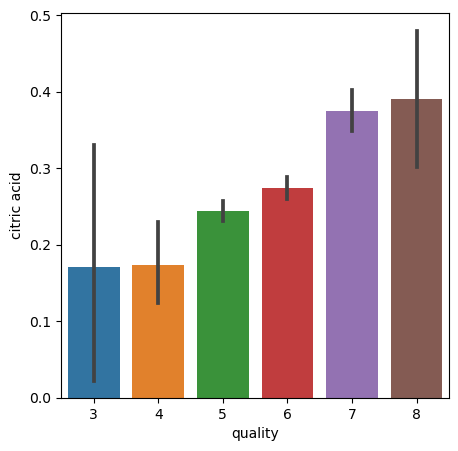

In [269]:
# Citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(data=wine_dataset, x="quality", y="citric acid")
plt.show()

 ## Correlation


In [270]:
correlation = wine_dataset.corr()

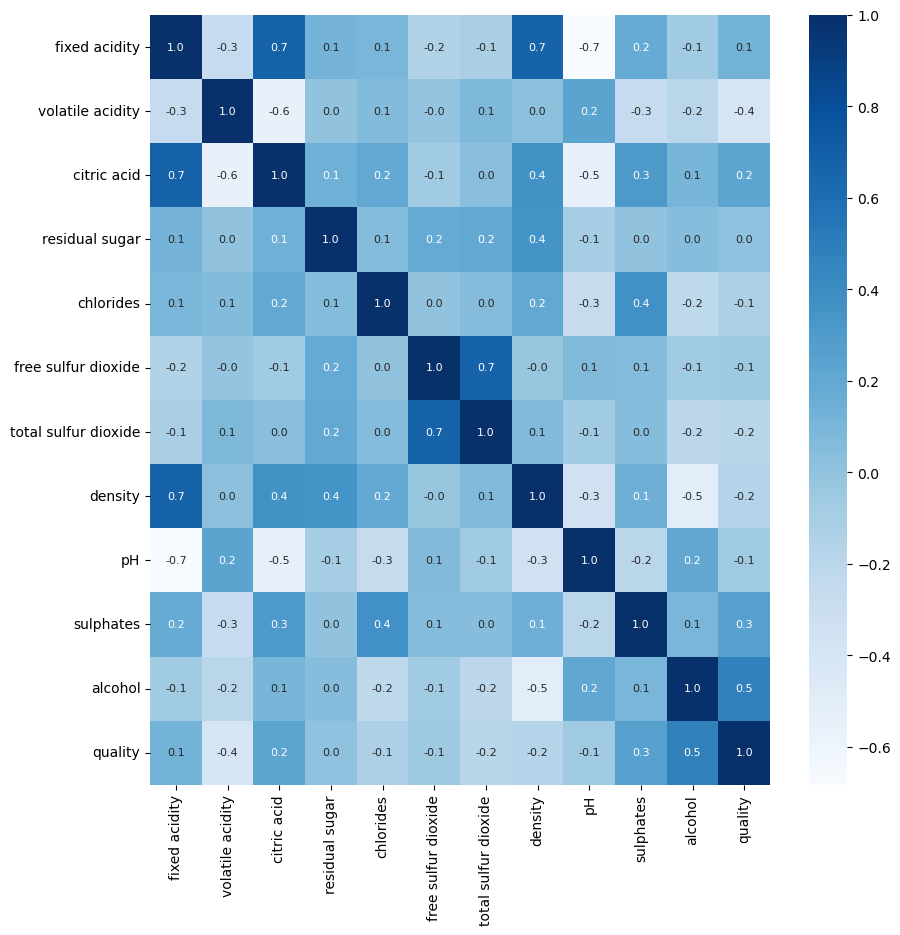

In [271]:
# Constructing a headmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")
plt.show()

## Data Preprocessing

In [272]:
# Separate the dta and label
x = wine_dataset.drop("quality", axis=1)

In [273]:
x.shape

(1599, 11)

### Label binarization

In [274]:
y = wine_dataset["quality"].apply(lambda y_value: 1 if y_value>= 7 else 0)   # quality wine = 1 (7,8)   not quality = 0 

In [275]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Imbalance Data Handle

In [276]:
# apply SMOTE 
smote = SMOTE()

In [277]:
x_smote, y_smote = smote.fit_resample(x, y)

In [278]:
x = x_smote
y = y_smote

In [279]:
x.shape

(2764, 11)

In [280]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

### Splitting the data into Train and Test

In [281]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

## Model Training

### Random Forest

In [282]:
model = RandomForestClassifier()

In [283]:
model.fit(x_train, y_train)

RandomForestClassifier()

## Model Evaluation

In [284]:
# Training data accuracy
y_train_pred = model.predict(x_train)

In [285]:
print("Accuracy on training data: ", accuracy_score(y_train, y_train_pred))

Accuracy on training data:  1.0


In [286]:
# Testing data accuracy
y_test_pred = model.predict(x_test)

In [287]:
print("Accuracy on test data: ", accuracy_score(y_test, y_test_pred))

Accuracy on test data:  0.9620253164556962


In [288]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       277
           1       0.94      0.99      0.96       276

    accuracy                           0.96       553
   macro avg       0.96      0.96      0.96       553
weighted avg       0.96      0.96      0.96       553



In [289]:
confusion_matrix(y_test, y_test_pred)

array([[259,  18],
       [  3, 273]], dtype=int64)

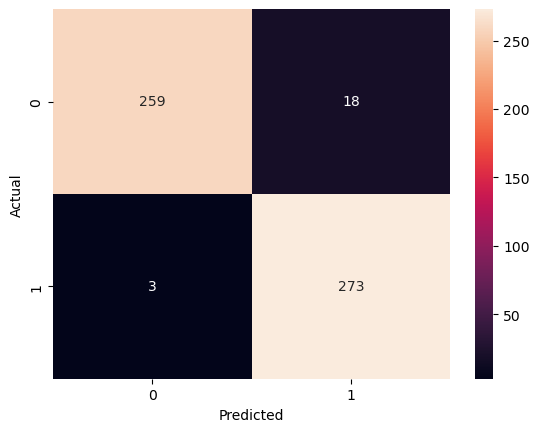

In [290]:
sns.heatmap(data=confusion_matrix(y_test, y_test_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Building a Predictive System

In [303]:
input_data = (6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.9948,3.51,0.43,11.4)

# Changing the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction == 1) :
    print("The wine is a good quality wine")
else:
    print("The wine is not a good quality wine")

[0]
The wine is not a good quality wine


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## User Input System

In [312]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         2764 non-null   float64
 1   volatile acidity      2764 non-null   float64
 2   citric acid           2764 non-null   float64
 3   residual sugar        2764 non-null   float64
 4   chlorides             2764 non-null   float64
 5   free sulfur dioxide   2764 non-null   float64
 6   total sulfur dioxide  2764 non-null   float64
 7   density               2764 non-null   float64
 8   pH                    2764 non-null   float64
 9   sulphates             2764 non-null   float64
 10  alcohol               2764 non-null   float64
dtypes: float64(11)
memory usage: 237.7 KB


In [313]:
fixedAcidity = float(input("Input fixed acidity value: "))

Input fixed acidity value: 6.9


In [314]:
volatileAcidity = float(input("Input volatile acidity value: "))

Input volatile acidity value: 1.09


In [315]:
citricAcid  = float(input("Input citric acid value: "))

Input citric acid value: 0.06


In [316]:
residualSugar = float(input("Input residual sugar value: "))

Input residual sugar value: 2.1


In [317]:
chlorides = float(input("Input chlorides value: "))

Input chlorides value: 0.061


In [318]:
freeSulfurDioxide = float(input("Input free sulfur dioxide value: "))

Input free sulfur dioxide value: 12.0


In [319]:
totalSulfurDioxide = float(input("Input total sulfur dioxide value: "))

Input total sulfur dioxide value: 31


In [320]:
density = float(input("Input density value: "))

Input density value: 0.9948


In [326]:
pH = float(input("Input pH value: "))

Input pH value: 3.51


In [327]:
sulphates  = float(input("Input sulphates value: "))

Input sulphates value: 0.43


In [328]:
alcohol  = float(input("Input alcohol value: "))

Input alcohol value: 11.4


In [329]:
input_data = (fixedAcidity, 
              volatileAcidity, 
              citricAcid, 
              residualSugar, 
              chlorides, 
              freeSulfurDioxide, 
              totalSulfurDioxide, 
              density, 
              pH, 
              sulphates, 
              alcohol,)

In [330]:
# Changing the input data to a numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction == 1) :
    print("The wine is a good quality wine")
else:
    print("The wine is not a good quality wine")

[0]
The wine is not a good quality wine


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
